In [1]:
import matplotlib.pyplot as plt

from ovals.geometry import Oval, Ellipse
from ovals.math_calculations import get_lines_intersection_point

In [2]:
def get_figure(plt, title, figsize=(20, 10)):
    plt.figure(figsize=figsize)
    plt.title(title, fontsize=18)
    plt.xlabel('x', fontsize=14)
    plt.ylabel('y', fontsize=14)
    return plt

def put_points(plt, points, color='ro', markersize=1, labels=None):
    x_points = [p.x for p in points]
    y_points = [p.y for p in points]
    plt.plot(x_points, y_points, color, markersize=markersize)
    if labels:
        for label, x, y in zip(labels, x_points, y_points):
            plt.annotate(label, xy=(x, y), xytext=(-20, 20), textcoords='offset points', 
                         ha='right', va='bottom', bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                         arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    
    return plt


# def put_points_annotate(pl, )

### Отрисуем эллипс.

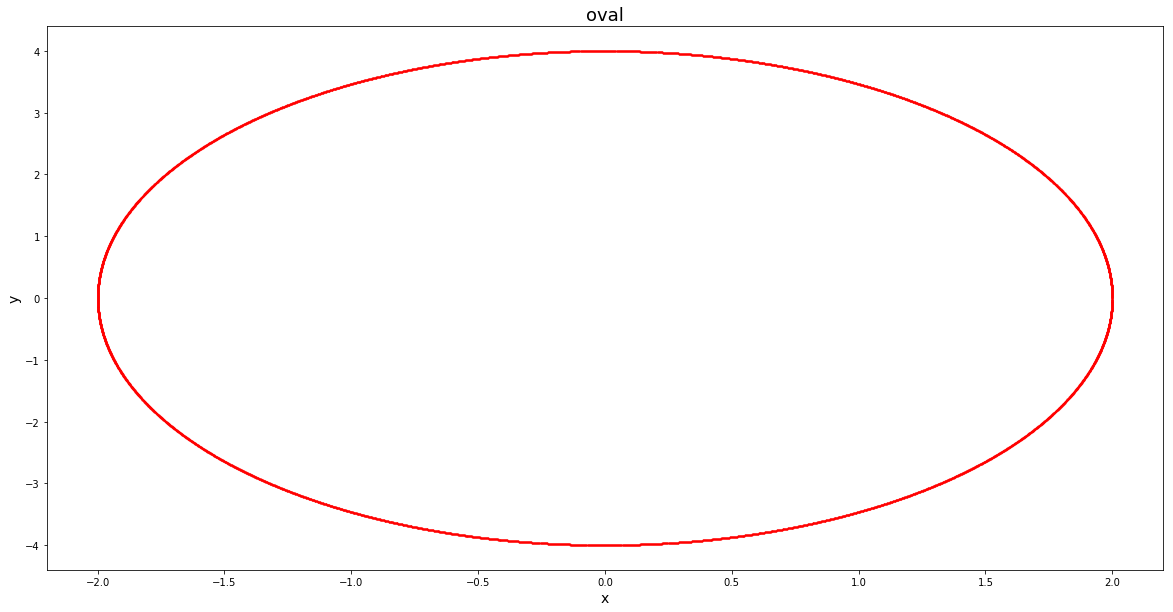

In [3]:
a = 2
b = 4
ellipse = Ellipse(a, b)
put_points(get_figure(plt, 'oval'), ellipse.points).show()

### Преобразуем его к овалу и отрисуем касательные

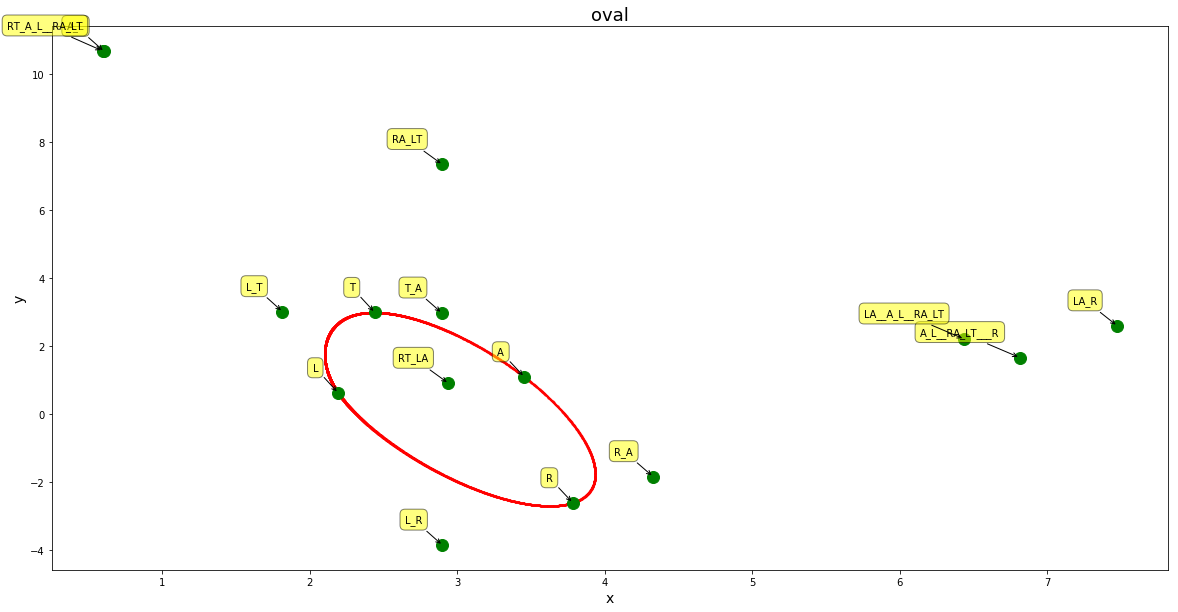

In [44]:
a = 2
b = 4
power = 1.3
oval = Oval(a, b, power)
oval.projective_transform(10, 12, 3, 10, 4, 12, 6, 2)
L = oval.points[-253]
R = oval.points[-2393]
A = oval.points[3300]
T = oval.points[2600]

LA = oval.form_line_by_two_points(L, A)
LT = oval.form_line_by_two_points(L, T)
RA = oval.form_line_by_two_points(R, A)
RT = oval.form_line_by_two_points(R, T)


L_tangent = oval.get_tangent_line(L, down_power=2., up_power=2.0, left_power=2.0, right_power=2.0)
R_tangent = oval.get_tangent_line(R, left_power=1, right_power=1.3, down_power=12.7, up_power=1)
A_tangent = oval.get_tangent_line(A, left_power=1, right_power=.3, down_power=1.7, up_power=1)
T_tangent = oval.get_tangent_line(T, left_power=1, right_power=.3, down_power=1.7, up_power=1)

L_R = get_lines_intersection_point(L_tangent, R_tangent)
L_T = get_lines_intersection_point(L_tangent, T_tangent)
A_L = get_lines_intersection_point(A_tangent, L_tangent)
R_A = get_lines_intersection_point(R_tangent, A_tangent)
A_L__RA_LT = oval.form_line_by_two_points(A_L, RA_LT)
A_L__RA_LT___R = get_lines_intersection_point(R_tangent, A_L__RA_LT)
LA_R = get_lines_intersection_point(LA, R_tangent)
RT_A_L__RA_LT = get_lines_intersection_point(RT, A_L__RA_LT)
RA_LT = get_lines_intersection_point(RA, LT)
RT_LA = get_lines_intersection_point(RT, LA)
T_A = get_lines_intersection_point(T_tangent, A_tangent)
LA__A_L__RA_LT = get_lines_intersection_point(LA, A_L__RA_LT)

p = get_figure(plt, 'oval')
p = put_points(p, oval.points)
p = put_points(p, [L_R, L, R, T, A, L_T, RA_LT, LA_R, A_L, R_A, A_L__RA_LT___R, RT_A_L__RA_LT, T_A, RT_LA, LA__A_L__RA_LT], 'go', markersize=12, labels=['L_R', 'L', 'R', 'T', 'A', 'L_T', 'RA_LT', 'LA_R', 'A_L', 'R_A', 'A_L__RA_LT___R', 'RT_A_L__RA_LT', 'T_A', 'RT_LA', 'LA__A_L__RA_LT'])
p = put_points(p, oval.form_line_by_two_points(L, R).points, 'go')
p.show()